In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

%matplotlib inline

In [2]:
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(357148, 65)
(357148, 1)
(153064, 65)
(153064, 1)


#### Feature scaling
Fitting on only training data to avoid data leakage.

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train, y_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

____

### Model creation
#### ANN

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [6]:
model = Sequential()

model.add(Dense(65, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

In [8]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.6490 - val_loss: 0.6282
Epoch 2/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.6335 - val_loss: 0.6256
Epoch 3/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.6318 - val_loss: 0.6258
Epoch 4/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.6310 - val_loss: 0.6250
Epoch 5/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.6302 - val_loss: 0.6249
Epoch 6/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.6302 - val_loss: 0.6246
Epoch 7/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.6296 - val_loss: 0.6229
Epoch 8/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.6292 - val_loss: 0.6236
Epoch 9/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.6285 - val_loss: 0.6256
Epoch 10/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.6293 - val_loss: 0.6243
Epoch 11/100
11161/11161 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.6290 - val

<Axes: >

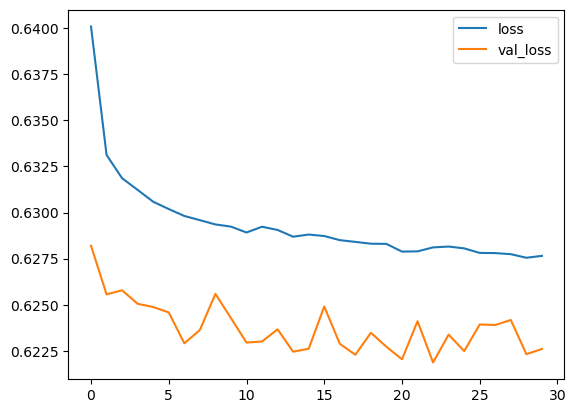

In [9]:
pd.DataFrame(model.history.history).plot()

In [10]:
pred = model.predict(x_test)

4784/4784 ━━━━━━━━━━━━━━━━━━━━ 3s 586us/step


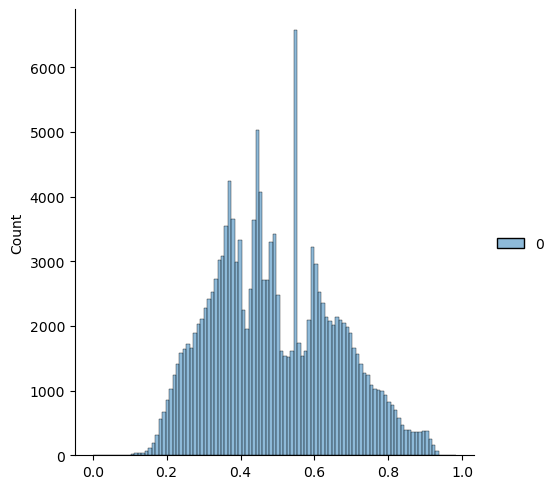

In [11]:
sns.displot(pred)

In [12]:
class_pred = np.where(pred > 0.5, 1, 0)
print(confusion_matrix(y_test, class_pred))
print(classification_report(y_test, class_pred))

[[54625 22055]
 [31223 45161]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67     76680
           1       0.67      0.59      0.63     76384

    accuracy                           0.65    153064
   macro avg       0.65      0.65      0.65    153064
weighted avg       0.65      0.65      0.65    153064



#### LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()

lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

c:\Users\sudhn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sudhn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[51960 24720]
 [28716 47668]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66     76680
           1       0.66      0.62      0.64     76384

    accuracy                           0.65    153064
   macro avg       0.65      0.65      0.65    153064
weighted avg       0.65      0.65      0.65    153064



___
#### CatBoostClassifier

In [14]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(loss_function='Logloss', iterations=50, learning_rate=0.4, random_seed=42)

model.fit(x_train, y_train, eval_set=(x_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6530680	test: 0.6526299	best: 0.6526299 (0)	total: 195ms	remaining: 9.53s
1:	learn: 0.6379920	test: 0.6373137	best: 0.6373137 (1)	total: 238ms	remaining: 5.71s
2:	learn: 0.6318463	test: 0.6310089	best: 0.6310089 (2)	total: 298ms	remaining: 4.67s
3:	learn: 0.6289835	test: 0.6281253	best: 0.6281253 (3)	total: 341ms	remaining: 3.92s
4:	learn: 0.6275618	test: 0.6266653	best: 0.6266653 (4)	total: 386ms	remaining: 3.48s
5:	learn: 0.6258796	test: 0.6249101	best: 0.6249101 (5)	total: 437ms	remaining: 3.21s
6:	learn: 0.6252702	test: 0.6243499	best: 0.6243499 (6)	total: 488ms	remaining: 3s
7:	learn: 0.6244697	test: 0.6235858	best: 0.6235858 (7)	total: 537ms	remaining: 2.82s
8:	learn: 0.6239127	test: 0.6230521	best: 0.6230521 (8)	total: 580ms	remaining: 2.64s
9:	learn: 0.6236156	test: 0.6227711	best: 0.6227711 (9)	total: 623ms	remaining: 2.49s
10:	learn: 0.6231622	test: 0.6223608	best: 0.6223608 (10)	total: 675ms	remaining: 2.39s
11:	learn: 0.6229316	test: 0.6221581	best: 0.6221581 (1

In [15]:
prob = model.predict_proba(x_test)

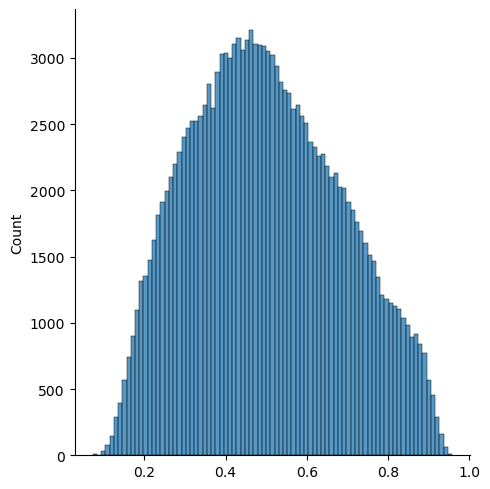

In [16]:
sns.displot(prob[:, 1])

In [17]:
class_pred = np.where(prob[:, 1] > 0.5, 1, 0)
print(confusion_matrix(y_test, class_pred))
print(classification_report(y_test, class_pred))

[[52023 24657]
 [27857 48527]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66     76680
           1       0.66      0.64      0.65     76384

    accuracy                           0.66    153064
   macro avg       0.66      0.66      0.66    153064
weighted avg       0.66      0.66      0.66    153064



Since we have adjusted our unbalanced dataset, metrics we are concerned with are precision and f1-score.

By comparing all three models we can see that <b>CatBoostClassifier performs slightly better</b> in terms of both precision and f1-score
___